# Analyze test restuls

Here, we analyze the results obtained by the test dataset.

- Check the histogram of the detection statistics for the noise dataset and for the CBC dataset
- Plot the figure of p_det vs FAP and calculate the area under the curve (AUC).

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
# from dl4longcbc.dataset_test import TestResult

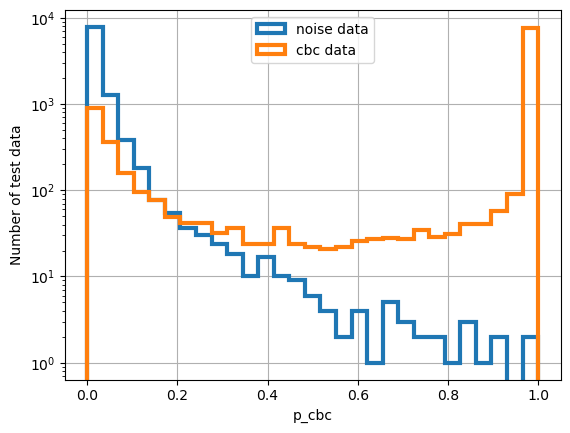

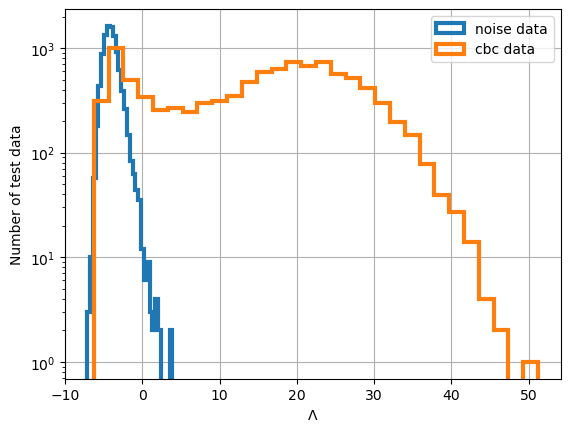

In [2]:
modelname = 'smearing_ksize5-5_channels64_relu'
rootdir = './data/models/'
modeldir = os.path.join(rootdir, modelname)
noisedir = os.path.join(modeldir, 'test_noise')
cbcdir = os.path.join(modeldir, 'test_cbc')
figuredir = os.path.join(modeldir, 'figure')
if not os.path.exists(figuredir):
    os.makedirs(figuredir)

with open(os.path.join(noisedir, 'result.pkl'), 'rb') as fo:
    data_n = pickle.load(fo)
with open(os.path.join(cbcdir, 'result.pkl'), 'rb') as fo:
    data_s = pickle.load(fo)

pcbc_noise = data_n['output'][:, 1]
pcbc_cbc = data_s['output'][:, 1]
xnoise = data_n['presoftmax'][:, 1] - data_n['presoftmax'][:, 0]
xcbc = data_s['presoftmax'][:, 1] - data_s['presoftmax'][:, 0]

plt.figure()
plt.hist(pcbc_noise, bins=np.linspace(0, 1, 30), histtype='step', lw=3, label='noise data')
plt.hist(pcbc_cbc, bins=np.linspace(0, 1, 30), histtype='step', lw=3, label='cbc data')
plt.yscale('log')
plt.xlabel('p_cbc')
plt.ylabel('Number of test data')
plt.legend()
plt.grid()
# plt.savefig(os.path.join(figuredir, 'hist_pcbc.pdf'))

plt.figure()
plt.hist(xnoise, bins=30, histtype='step', lw=3, label='noise data')
plt.hist(xcbc, bins=30, histtype='step', lw=3, label='cbc data')
plt.yscale('log')
plt.xlabel(r'$\Lambda$')
plt.ylabel('Number of test data')
plt.legend()
plt.grid()
# plt.savefig(os.path.join(figuredir, 'hist_usrcbc.pdf'))

plt.show()

AUC = 0.944419685


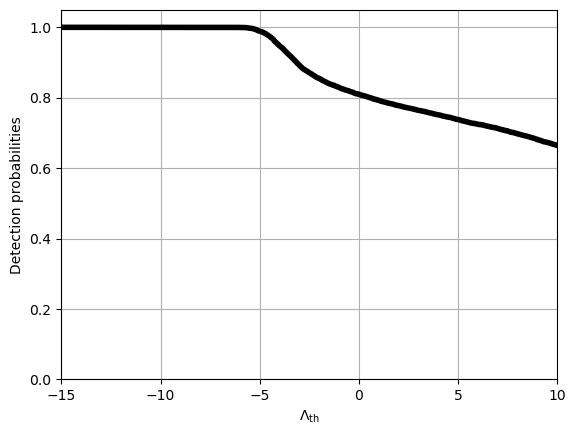

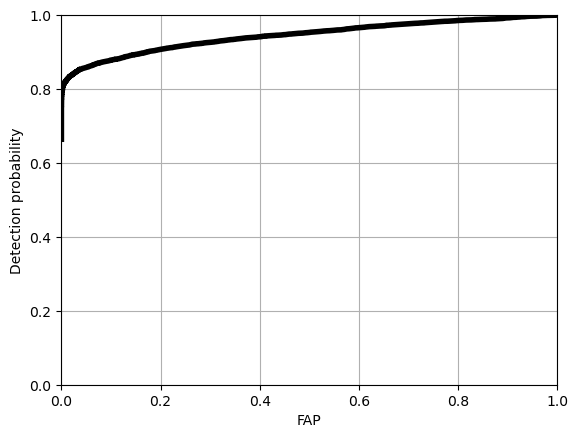

In [3]:
xth_samples = np.linspace(-15, 10, 10000)
number_of_false_alarms = [np.sum(xnoise.numpy() >= xth) for xth in xth_samples]
false_alarm_probabilities = np.divide(number_of_false_alarms, 10000)
number_of_detections = [np.sum(xcbc.numpy() >= xth) for xth in xth_samples]
detection_probabilities = np.divide(number_of_detections, 10000)
auc = np.trapezoid(detection_probabilities[::-1], false_alarm_probabilities[::-1])
print(f'AUC = {auc}')

plt.figure()
plt.plot(xth_samples, detection_probabilities, lw=4, c='k')
plt.xlabel(r'$\Lambda_\mathrm{th}$')
plt.ylabel('Detection probabilities')
plt.xlim([-15, 10])
plt.ylim([0.0, 1.05])
plt.grid()
plt.grid(which='minor', linestyle=':')

plt.figure()
plt.plot(false_alarm_probabilities, detection_probabilities, lw=4, c='k')
plt.xlabel('FAP')
plt.ylabel('Detection probability')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.grid(which='minor', linestyle=':')

plt.show()